## 분석 결과
- 입원기간은 환자통증정도에 영향을 미친다는 것을 확인함.
- '통증기간(월)', '연령', '체중', 'Large Lymphocyte', '수술기법'는 환자통증정도에 영향을 끼치지 않음을 확인함.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../dataset/RecurrenceOfSurgery.csv')
df.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [39]:
#%matplotlib tk  
%matplotlib inline

In [7]:
df_ROS = df[['환자통증정도','입원기간', '통증기간(월)', '연령', '체중', 'Large Lymphocyte', '수술기법']]

In [8]:
df_ROS = df_ROS.dropna()

In [9]:
df_ROS.isnull().sum()

환자통증정도              0
입원기간                0
통증기간(월)             0
연령                  0
체중                  0
Large Lymphocyte    0
수술기법                0
dtype: int64

## 목표변수 검증

### Y:연속형 : 단일 변수에 대한 정규성 여부 판단
- 검증 갯수 따른 방법 선택 (레코드 갯수)
    - 5천개보다 이하 : shapiro normality test
    - 5천개보다 이상 : Anderson normality test

#### 선정 변수: 환자통증정도
- 분석 내용 : 환자통증정도이 정규 분포를 따르는가?
    - 귀무가설 : 환자통증정도이 정규 분포이다.
    - 대립가설 : 환자통증정도이 정규 분포가 아니다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=8.12e-44이므로 대립가설 참
    - 사실 결론 : 환자통증정도이 정규 분포가 아니다.

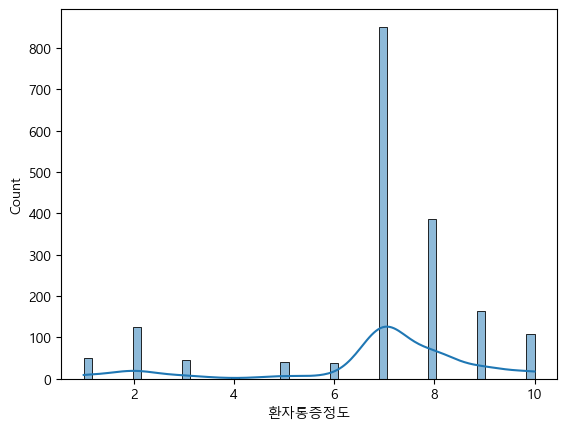

In [40]:
sns.histplot(data=df_ROS, x='환자통증정도', kde=True)
plt.show()

In [10]:
df_ROS['환자통증정도'].count()

1809

In [13]:
stats.shapiro(df_ROS['환자통증정도'])

## statistic=0.7832  pvalue=8.12e-44 -> 0.05이상임으로 대립가설 참 

ShapiroResult(statistic=0.7832338809967041, pvalue=8.127531093083939e-44)

## 설명변수 검증
- '입원기간', '통증기간(월)', '연령', '체중', 'Large Lymphocyte', '수술기법'

### X:연속형 / Y:연속형 : 주로 상관관계 확인
- correlation coefficient(상관계수)
   -  -1 ~ 1
   -  0에 가까우면 관계없음, -1로 갈수록 반비례, 1로 갈수로 정비례

In [14]:
df_ROS[['환자통증정도','입원기간', '통증기간(월)', '연령', '체중', 'Large Lymphocyte', '수술기법']].describe()

# count 
# mean : 연속형이라는 증거 

,환자통증정도,입원기간,통증기간(월),연령,체중,Large Lymphocyte
count,1809.000000,1809.000000,1809.000000,1809.000000,1809.000000,1809.000000
mean,6.887783,1.657822,5.849033,41.493643,68.129630,39.314981
std,2.087179,1.995181,17.476286,13.495127,11.126712,13.688434
min,1.000000,0.000000,0.000000,15.000000,35.000000,0.000000
25%,7.000000,1.000000,1.000000,32.000000,59.800000,30.600000
50%,7.000000,1.000000,2.000000,41.000000,68.000000,40.300000
75%,8.000000,2.000000,4.000000,49.000000,75.000000,48.600000
max,10.000000,46.000000,360.000000,86.000000,136.100000,89.000000


#### 선정 변수: 환자통증정도, 입원기간
- 분석 내용 : 입원기간에 따라서 환자통증정도가 변화가 있는가?
    - 귀무가설 : 입원기간에 따라서 환자통증정도가 변화가 없다.
    - 대립가설 : 입원기간에 따라서 환자통증정도가 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=2.0e-06이므로 대립가설 참
    - 사실 결론 : 입원기간에 따라서 환자통증정도가 변화가 있다.

In [15]:
df_ROS[['환자통증정도','입원기간']].corr()

,환자통증정도,입원기간
환자통증정도,1.000000,0.061035
입원기간,0.061035,1.000000


In [17]:
stats.spearmanr(df_ROS['입원기간'],df_ROS['환자통증정도'] )

## statistic=0.11, pvalue=2.0e-06  -> 대립참, 상관계수 관계 없음 

SignificanceResult(statistic=0.11147619787899554, pvalue=2.005325495241957e-06)

#### 선정 변수: 환자통증정도, 통증기간(월)
- 분석 내용 : 통증기간에 따라서 환자통증정도가 변화가 있는가?
    - 귀무가설 : 통증기간에 따라서 환자통증정도가 변화가 없다.
    - 대립가설 : 통증기간에 따라서 환자통증정도가 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 :pvalue=0.5147 이므로 귀무가설 참
    - 사실 결론 : 통증기간에 따라서 환자통증정도가 변화가 없다.

In [18]:
df_ROS[['환자통증정도','통증기간(월)']].corr()

,환자통증정도,통증기간(월)
환자통증정도,1.000000,-0.071558
통증기간(월),-0.071558,1.000000


In [19]:
stats.spearmanr(df_ROS['통증기간(월)'],df_ROS['환자통증정도'] )

##statistic=-0.015, pvalue=0.5147 --> 귀무가설 참, 상관계수 관계없음

SignificanceResult(statistic=-0.015326587532261267, pvalue=0.5147474465377997)

#### 선정 변수: 환자통증정도, 연령
- 분석 내용 : 연령에 따라서 환자통증정도가 변화가 있는가?
    - 귀무가설 : 연령에 따라서 환자통증정도가 변화가 없다.
    - 대립가설 : 연령에 따라서 환자통증정도가 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=0.25이므로 귀무가설 참
    - 사실 결론 : 연령에 따라서 환자통증정도가 변화가 없다.

In [20]:
df_ROS[['환자통증정도','연령']].corr()

,환자통증정도,연령
환자통증정도,1.000000,0.059758
연령,0.059758,1.000000


In [22]:
stats.spearmanr(df_ROS['연령'],df_ROS['환자통증정도'] )

## statistic=0.0266, pvalue=0.25 -->  귀무가설 참, 상관계수 관계없음

SignificanceResult(statistic=0.026600054169033972, pvalue=0.2581474339061653)

#### 선정 변수: 환자통증정도, 체중
- 분석 내용 : 체중에 따라서 환자통증정도가 변화가 있는가?
    - 귀무가설 : 체중에 따라서 환자통증정도가 변화가 없다.
    - 대립가설 : 체중에 따라서 환자통증정도가 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=0.275이므로 귀무가설 참
    - 사실 결론 : 체중에 따라서 환자통증정도가 변화가 없다.

In [23]:
df_ROS[['환자통증정도','체중']].corr()

,환자통증정도,체중
환자통증정도,1.000000,0.026377
체중,0.026377,1.000000


In [25]:
stats.spearmanr(df_ROS['체중'],df_ROS['환자통증정도'] )

## statistic=0.025, pvalue=0.275 --> 귀무가설 참, 상관계수 관계없음

SignificanceResult(statistic=0.02566332608317305, pvalue=0.2752964129586925)

#### 선정 변수: 환자통증정도, Large Lymphocyte
- 분석 내용 : Large Lymphocyte에 따라서 환자통증정도가 변화가 있는가?
    - 귀무가설 : Large Lymphocyte에 따라서 환자통증정도가 변화가 없다.
    - 대립가설 : Large Lymphocyte에 따라서 환자통증정도가 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=0.352 이므로 귀무가설 참
    - 사실 결론 : 체중에 따라서 환자통증정도가 변화가 없다.

In [26]:
df_ROS[['환자통증정도','Large Lymphocyte']].corr()

,환자통증정도,Large Lymphocyte
환자통증정도,1.000000,-0.019204
Large Lymphocyte,-0.019204,1.000000


In [27]:
stats.spearmanr(df_ROS['Large Lymphocyte'],df_ROS['환자통증정도'] )

## statistic=-0.021, pvalue=0.352 --> 귀무가설 참, 상관계수 관계없음

SignificanceResult(statistic=-0.021865498120926672, pvalue=0.3526512066072861)

### x : 범주형 / Y:연속형 : 범주형 따른 상관관계 확인

### 선정 변수: 수술기법(항목 2), 환자통증정도(비정규분포)- Wilcoxon Test
- 분석 내용 : 수술기법에 따라 환자통증정도의 평균이 차이가 있는가?
    - 귀무가설 : 입원기간 평균에 차이 없다.
    - 대립가설 : 입원기간 평균에 차이 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=1.0, 귀무가설 참
    - 사실 결론 : 입원기간 평균에 차이 없다.

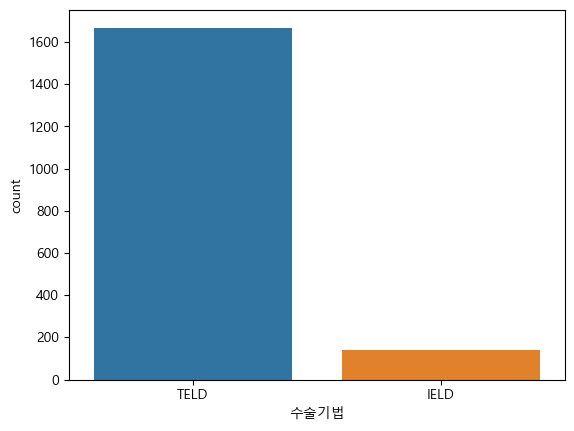

In [28]:
sns.countplot(data=df_ROS, x='수술기법')
plt.show()

In [29]:
df_ROS['수술기법'].value_counts() 

# 2집단의 범주

TELD    1669
IELD     140
Name: 수술기법, dtype: int64

In [30]:
df_method = df_ROS[['환자통증정도','수술기법']]
df_method[:2]

,환자통증정도,수술기법
0,10,TELD
1,10,TELD


In [31]:
df_TELD = df_method[df_method['수술기법'] == 'TELD']
df_TELD[:2]

,환자통증정도,수술기법
0,10,TELD
1,10,TELD


In [32]:
df_IELD = df_method[df_method['수술기법'] == 'IELD']
df_TELD[:2]

,환자통증정도,수술기법
0,10,TELD
1,10,TELD


In [34]:
stats.ranksums(df_TELD['환자통증정도'], df_TELD['환자통증정도'])

## statistic=0.0, pvalue=1.0 -> 0.05보다 큼, 귀무가설 참 

RanksumsResult(statistic=0.0, pvalue=1.0)